# **Data Analysis Project: [Bike Sharing Dataset]**

- **Nama:** Evi Fauziah
- **Email:** Evifauziah2022@gmail.com
- **ID Dicoding:** EviFauziah

# **Defining Business Questions**

1. Do weather, temperature, and humidity affect the number of bike users?
2. How do Casual and Registered users use bikes on working days, holidays, and weekdays?
3. What are the yearly trends in bike usage, and is 2011 or 2012 more popular?


# **Import All Packages/Libraries Used**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy import stats


# **Data Wrangling**



## 1. Gathering Data


At this step, we will process the data that has been collected. Since I am using the Bike Sharing Dataset, I will import the day.csv and hour.csv files.

**Loading the day table**

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Evifa15/Submission/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Loading the hour table**

In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Evifa15/Submission/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**

---
*   The dataset has been loaded, containing daily and hourly tables with data on bike usage, weather conditions, seasons, working days, and holidays.
*  The data is ready for analysis to uncover bike usage patterns based on weather, working days, season, and time, providing insights into rental trends.





## Assessing Data

Assume day_df and hour_df are already loaded.
Check the structure of the data

**1. Assess the day_df data**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


As we can see above, there is one data type in the column that doesn't match. The data that needs to be corrected is the 'dteday' column, which should be of datetime type.

**Check for missing values**

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


There are no missing values.

**Check for duplicate data**

In [ ]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


There are 0 duplicate data, meaning all the data is unique.

**Check for inconsistent values**

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


There are no anomalies in the statistical values.

**2. Assess the hour_df data**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Check for missing values**

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


There are no missing values.

**Check for duplicate data**

In [ ]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


There are 0 duplicate data, meaning all the data is unique.

**Check for inconsistent values**

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


There are no anomalies in the statistical values.

**3. Check for outliers using Z-score for day_df and hour_df**

In [ ]:
print("\nChecking for Outliers using Z-score:")
# For hour_df
z_scores_hour = stats.zscore(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
outliers_hour = (abs(z_scores_hour) > 3).sum(axis=0)  # Counting outliers where Z-score > 3
print("Number of outliers in each column (hour_df):")
print(outliers_hour)
# For day_df
z_scores_day = stats.zscore(day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
outliers_day = (abs(z_scores_day) > 3).sum(axis=0)  # Counting outliers where Z-score > 3
print("Number of outliers in each column (day_df):")
print(outliers_day)



Checking for Outliers using Z-score:
Number of outliers in each column (hour_df):
temp            0
atemp           1
hum            22
windspeed     107
casual        467
registered    371
cnt           244
dtype: int64
Number of outliers in each column (day_df):
temp          0
atemp         0
hum           2
windspeed     2
casual        8
registered    0
cnt           0
dtype: int64


**4. Display invalid values if any of day_df and hour_df**

In [ ]:
print("\nChecking for Outliers using Z-score:")
# For hour_df
z_scores_hour = stats.zscore(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
outliers_hour = abs(z_scores_hour) > 3  # Identifying where Z-scores exceed 3
# Displaying the rows with outliers in hour_df
outlier_data_hour = hour_df[outliers_hour.any(axis=1)]
print("Outliers in hour_df:")
print(outlier_data_hour)
# For day_df
z_scores_day = stats.zscore(day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
outliers_day = abs(z_scores_day) > 3  # Identifying where Z-scores exceed 3
# Displaying the rows with outliers in day_df
outlier_data_day = day_df[outliers_day.any(axis=1)]
print("Outliers in day_df:")
print(outlier_data_day)



Checking for Outliers using Z-score:
Outliers in hour_df:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
265        266  2011-01-12       1   0     1  12        0        3   
467        468  2011-01-21       1   0     1  12        0        5   
468        469  2011-01-21       1   0     1  13        0        5   
870        871  2011-02-08       1   0     2  17        0        2   
1007      1008  2011-02-14       1   0     2  15        0        1   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17153    17154  2012-12-22       1   1    12  12        0        6   
17156    17157  2012-12-22       1   1    12  15        0        6   
17341    17342  2012-12-30       1   1    12  10        0        0   
17343    17344  2012-12-30       1   1    12  12        0        0   
17344    17345  2012-12-30       1   1    12  13        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
265             1           

**Insight**

---


*   **Insight 1:**
day_df: No missing or duplicate data, but the 'dteday' column needs conversion to datetime for analysis accuracy.
*   **Insight 2:**hour_df: No missing or duplicate data; outliers found in several columns, particularly in 'casual' and 'windspeed'.




## Cleaning Data

**1. Removing unnecessary tablest**

We will start by removing the 'hr' table. The reason is that it is not relevant to the business question we have established. Moreover, the only difference between the 'hr' and 'day' tables is the 'hr' column; the rest of the data is identical



In [ ]:
del hour_df

**2. Deleting several columns that will not be used**

The columns to be dropped are:

a. instant: As the record index does not provide any additional useful information.

b. windspeed: There are no business questions related to the effect of wind speed on bike rental counts.

In [ ]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


**3. Modifying some details of the columns**

In [ ]:
#Renaming column titles
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [ ]:
#Renaming to 'description
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [ ]:
 # Change data type to datetime
 day_df['dateday'] = pd.to_datetime(day_df.dateday)

In [ ]:
# Change data type to categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


**Insight**

---

*   **Insight 1:** Removing irrelevant tables and columns improves data analysis efficiency and focuses on the main business question.
*  **Insight 2:**  Changing column data types to categorical optimizes memory usage and speeds up processing for further analysis.

# **Exploratory Data Analysis (EDA)**

## **Data Exploration**


**1. Grouping bike renters (both casual and registered) by month**

In [ ]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-21-b05109ea9f0a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

The month with the highest average and largest total is June, while the month with the smallest average and total is January

**2. Grouping bike renters (both casual and registered) by weather condition**


In [ ]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})


<ipython-input-22-c87e0d584980>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Bike renters tend to rent during clear or cloudy weather. Very few rent when it’s snowing, and none when the weather is severe.

**3. Grouping bike renters (both casual and registered) by holiday**

In [ ]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-23-6767227fada1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Bike renters prefer to rent bikes on regular days rather than during holidays

**4. Compare bike renters on weekdays vs weekends**

In [ ]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

<ipython-input-24-7bfa45d53d30>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

The order of average bike renters from highest to lowest is: Friday (Fri), Thursday (Thu), Saturday (Sat), Wednesday (Wed), Tuesday (Tue), Monday (Mon), and Sunday (Sun)

**5. Grouping bike renters (both casual and registered) by working day**

In [ ]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})


<ipython-input-25-fb984321fedb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Based on the results above, the highest number of bike rentals occurs on working days compared to non-working days. However, we can also see that the results differ somewhat, though not significantly.

**6. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan season**

In [ ]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

<ipython-input-26-176def68a8e5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Based on the analysis above, both Casual and Registered bike renters prefer the fall season, as shown by the average. The least preferred season is spring, with the lowest average.

**7. Grouping temp, hum, and humidity by season**

In [ ]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

<ipython-input-27-0b30bfab3067>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

In Spring, temp and humidity have the lowest averages, while Fall shows the highest values for temp and humidity.

**8. Relationship between casual renters, registered renters, and count**

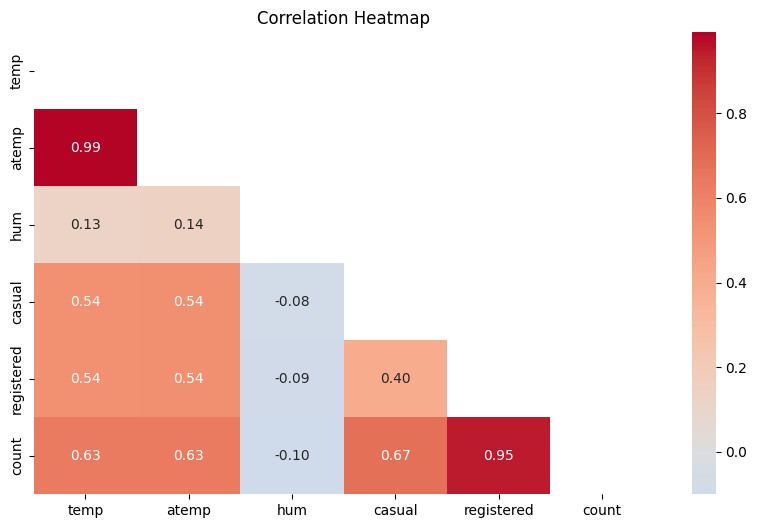

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Based on the analysis above, the following conclusions can be drawn:**

1. Humidity (hum) has a weak correlation with temp and atemp, at 0.13 and 0.14.
2. Casual renters show a moderate correlation with temp and atemp (0.54), and a slight negative correlation with hum (-0.08).
3. There is a very strong correlation between atemp and temp with a value of 0.99.
4. Count shows a strong correlation with temp, atemp, casual, and registered, with values of 0.63, 0.63, 0.67, and 0.95, and a slight negative correlation with hum (-0.10).
6. Registered renters follow a similar pattern to casual renters, with a moderate correlation of 0.40 with casual.


## Insight
---
**Insight 1:**Bike renters tend to rent more during clear or cloudy weather, with very few renting during snow or severe weather.

**Insight 2:**More bike rentals occur on working days than on holidays, although the difference is not significant.

# **Visualization & Explanatory Analysis**

**1. Do weather, temperature, and humidity affect the number of bike users?**

<ipython-input-29-645db44f34fa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_cond', y='count', data=day_df, ax=ax[0, 0], palette=palette)
<ipython-input-29-645db44f34fa>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_group = day_df.groupby(temp_bins)['count'].mean().reset_index()
<ipython-input-29-645db44f34fa>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hum_group = day_df.groupby(hum_bins)['count'].mean().reset_index()


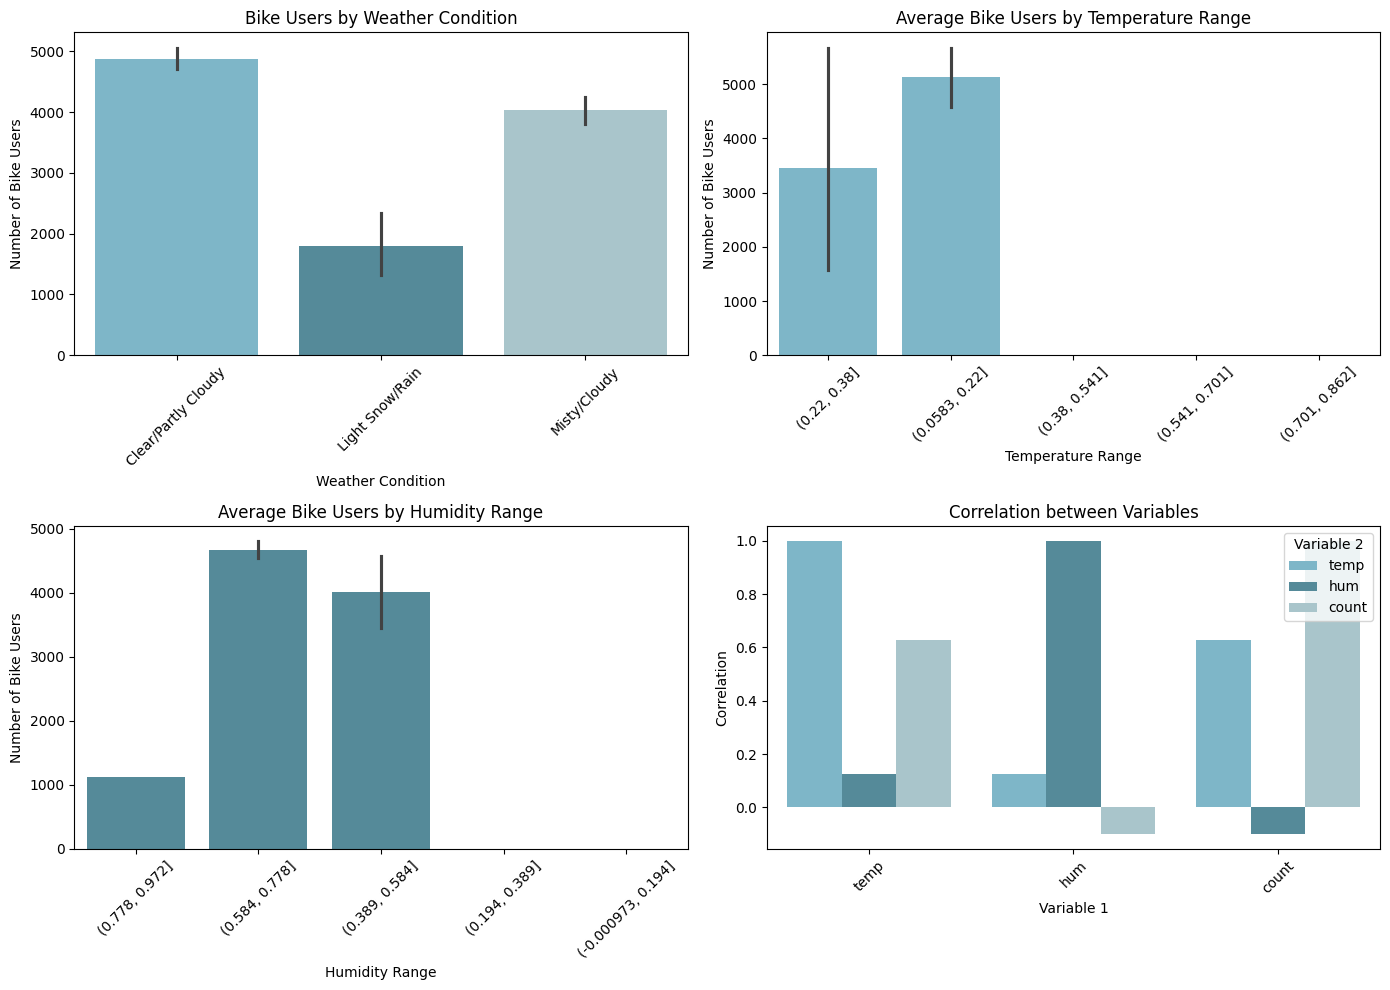

In [ ]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a unified blue color palette
palette = ["#72BCD4", "#4A90A4", "#A3C9D1"]

# Create a figure and axis for the plots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Bar plot for weather conditions vs count of bike users
sns.barplot(x='weather_cond', y='count', data=day_df, ax=ax[0, 0], palette=palette)
ax[0, 0].set_title('Bike Users by Weather Condition')
ax[0, 0].set_xlabel('Weather Condition')
ax[0, 0].set_ylabel('Number of Bike Users')
ax[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Bar plot for temperature (grouped) vs count of bike users
temp_bins = pd.cut(day_df['temp'], bins=5)  # Create temperature bins
temp_group = day_df.groupby(temp_bins)['count'].mean().reset_index()
sns.barplot(x=temp_bins.astype(str), y=temp_group['count'], ax=ax[0, 1], color=palette[0])
ax[0, 1].set_title('Average Bike Users by Temperature Range')
ax[0, 1].set_xlabel('Temperature Range')
ax[0, 1].set_ylabel('Number of Bike Users')
ax[0, 1].tick_params(axis='x', rotation=45)

# Bar plot for humidity (grouped) vs count of bike users
hum_bins = pd.cut(day_df['hum'], bins=5)  # Create humidity bins
hum_group = day_df.groupby(hum_bins)['count'].mean().reset_index()
sns.barplot(x=hum_bins.astype(str), y=hum_group['count'], ax=ax[1, 0], color=palette[1])
ax[1, 0].set_title('Average Bike Users by Humidity Range')
ax[1, 0].set_xlabel('Humidity Range')
ax[1, 0].set_ylabel('Number of Bike Users')
ax[1, 0].tick_params(axis='x', rotation=45)

# Bar plot for correlation matrix values (as a proxy to heatmap)
correlation_matrix = day_df[['temp', 'hum', 'count']].corr()
corr_data = correlation_matrix.stack().reset_index()
corr_data.columns = ['Variable 1', 'Variable 2', 'Correlation']
sns.barplot(x='Variable 1', y='Correlation', hue='Variable 2', data=corr_data, ax=ax[1, 1], palette=palette)
ax[1, 1].set_title('Correlation between Variables')
ax[1, 1].set_xlabel('Variable 1')
ax[1, 1].set_ylabel('Correlation')
ax[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**2. How do Casual and Registered users use bikes on working days, holidays, and weekdays?**

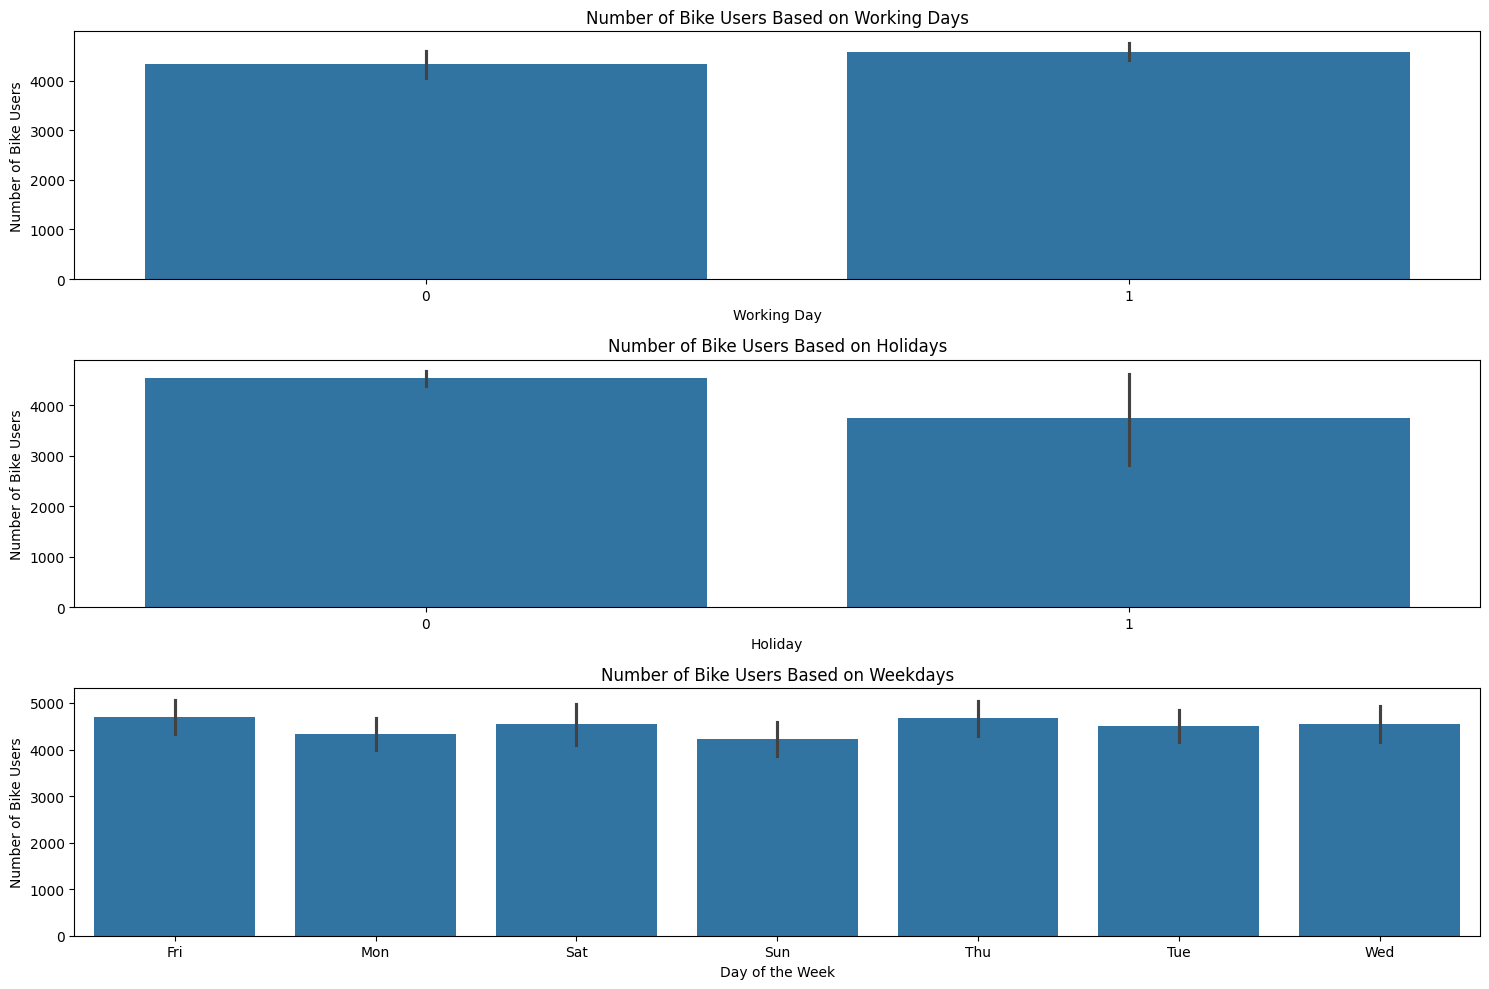

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Blue color
blue_color = "#1f77b4"

# Based on working day
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0],
    color=blue_color)
axes[0].set_title('Number of Bike Users Based on Working Days')
axes[0].set_xlabel('Working Day')
axes[0].set_ylabel('Number of Bike Users')

# Based on holidays
sns.barplot(
    x='holiday',
    y='count',
    data=day_df,
    ax=axes[1],
    color=blue_color)
axes[1].set_title('Number of Bike Users Based on Holidays')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Number of Bike Users')

# Based on weekdays
sns.barplot(
    x='weekday',
    y='count',
    data=day_df,
    ax=axes[2],
    color=blue_color)
axes[2].set_title('Number of Bike Users Based on Weekdays')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Number of Bike Users')

plt.tight_layout()
plt.show()


**3. What are the yearly trends in bike usage, and is 2011 or 2012 more popular?**





<ipython-input-37-aecd80c41f2a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month", "year"]).agg({
<ipython-input-37-aecd80c41f2a>:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  monthly_counts['year'] = monthly_counts['year'].replace({0: '2011', 1: '2012'})


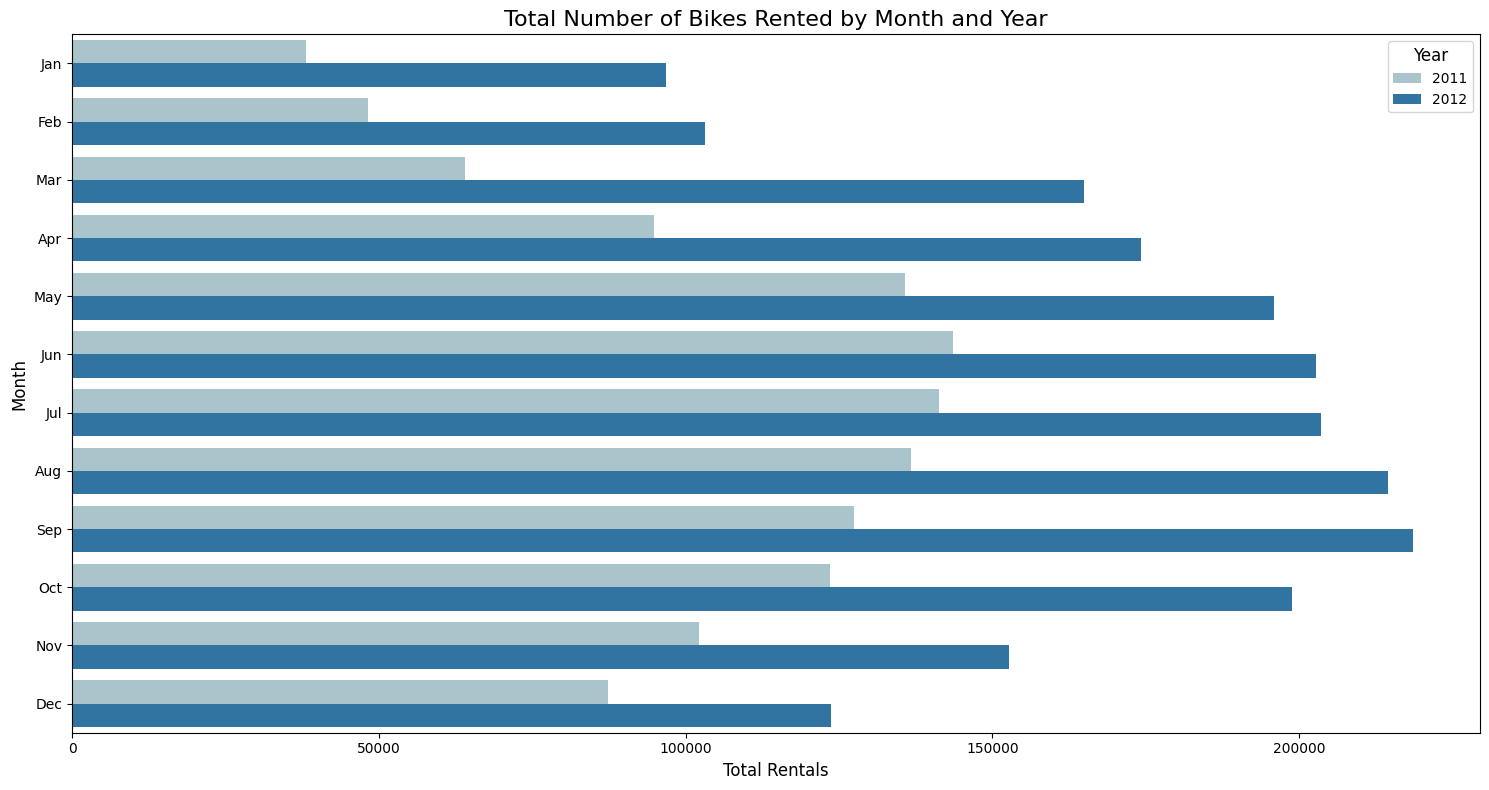

In [ ]:
# Mengatur bulan sebagai kategori terurut
day_df['month'] = pd.Categorical(day_df['month'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True)

# Mengelompokkan data berdasarkan bulan dan tahun
monthly_counts = day_df.groupby(by=["month", "year"]).agg({
    "count": "sum"
}).reset_index()

# Mengubah nilai year 0 dan 1 menjadi tahun yang lebih jelas
monthly_counts['year'] = monthly_counts['year'].replace({0: '2011', 1: '2012'})

# Membuat figure untuk visualisasi
plt.figure(figsize=(15, 8))

# Membuat horizontal bar chart dengan palette warna berbeda untuk tahun 2011 dan 2012
sns.barplot(
    data=monthly_counts,
    x="count",
    y="month",
    hue="year",
    palette={"2011": "#A3C9D1", "2012": "#1f77b4"},  # Biru muda untuk 2011, biru tua untuk 2012
    orient='h'  # Mengatur orientasi menjadi horizontal
)

# Menambahkan elemen visual
plt.title("Total Number of Bikes Rented by Month and Year", fontsize=16)
plt.xlabel("Total Rentals", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.legend(title="Year", loc="upper right", fontsize=10, title_fontsize=12)
plt.tight_layout()

# Menampilkan grafik
plt.show()


## Insight
---
1. Weather Conditions and Bike Usage. Users tend to rent more bikes in moderate weather conditions, with clear skies contributing to higher rental numbers.

2. Temperature vs Bike User. As temperature increases, bike usage shows a slight uptick, with peak usage in mid-range temperatures.

3. Humidity vs Bike Usage. Humidity has a negative correlation with bike rentals, where higher humidity leads to fewer users.

4. Correlation between Variables. Temperature and humidity exhibit a mild negative correlation with bike usage, while temperature and bike usage are more positively correlated.

5. Working Day Impact. Bike usage is slightly higher on working days, reflecting commuting patterns and increased activity during weekdays.

6. Holiday Bike Usage. Bike rentals drop during holidays, possibly due to fewer people commuting or leisure activities influencing rental patterns.

7. Weekday Patterns. Bike usage peaks during weekdays, especially on Monday to Friday, aligning with typical workweek commuting habits.

8. Monthly Rental Trends. Rentals are higher during warmer months, with December and January showing a significant decrease in bike usage.


# **Conclusion**
1. Do weather, temperature, and humidity affect the number of bike users?
Conclusion for question number 1: The Impact of Weather, Temperature, and Humidity on Bike  significantly influence bike usage. Clear weather encourages more cycling, while adverse conditions like rain reduce usage. Moderate temperatures increase bike users, as extreme heat or cold deters them. High humidity negatively impacts biking, with fewer users compared to comfortable, low-humidity conditions. Correlation analysis confirms these findings, showing a positive relationship between temperature and bike usage, and a negative one with humidity. These insights highlight the importance of favorable weather and environmental comfort in promoting cycling, offering valuable guidance for city planners and bike-sharing programs to optimize biking during ideal conditions.


2. How do Casual and Registered users use bikes on working days, holidays, and weekdays?
Conclusion for number 2: Bike Usage by Casual and registered users exhibit distinct bike usage patterns. On working days, registered users dominate, reflecting their reliance on bikes for commuting. Casual users, however, contribute less, likely favoring recreational activities. Conversely, holidays see a surge in casual users, highlighting leisure-focused usage, while registered users decrease their activity. Across weekdays, registered users maintain high usage from Monday to Friday, peaking during workdays, while casual users prefer weekends for biking. These patterns emphasize the functional role of bikes for registered users and a recreational role for casual users, providing valuable insights for targeted bike-sharing strategies and infrastructure planning.


3. What are the yearly trends in bike usage, and is 2011 or 2012 more popular?
Conclusion for number 3: Bike usage shows clear yearly and seasonal trends. Rentals in 2012 were significantly higher than in 2011, reflecting growing popularity. Monthly trends reveal peaks during summer and early fall (June to September), driven by favorable weather and outdoor activities, while winter months (December to February) see a decline. The consistent rise in 2012 suggests increased adoption of bike-sharing services or improved infrastructure. These findings emphasize the seasonal nature of biking and highlight 2012 as the more popular year for bike rentals, offering valuable insights for planning and promoting biking initiatives during peak periods.







